In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [3]:
df = pd.read_csv('stock_price.csv', index_col='日付け', parse_dates=True)
axis = ['close', 'open', 'high', 'low', 'volume', 'rate']
df.columns = axis
df.index.name = 'date'
df = df.sort_index()
df.head()

,close,open,high,low,volume,rate
date,,,,,,
1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%
1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%
1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%


In [4]:
def convert_volume(volume):
    if isinstance(volume, str):
        if 'B' in volume:
            return int(float(volume.replace('B', '')) * 1e9)
        elif 'M' in volume:
            return int(float(volume.replace('M', '')) * 1e6)
        elif 'K' in volume:
            return int(float(volume.replace('K', '')) * 1e3)
    return int(volume)

df['volume'] = df['volume'].apply(convert_volume)

c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


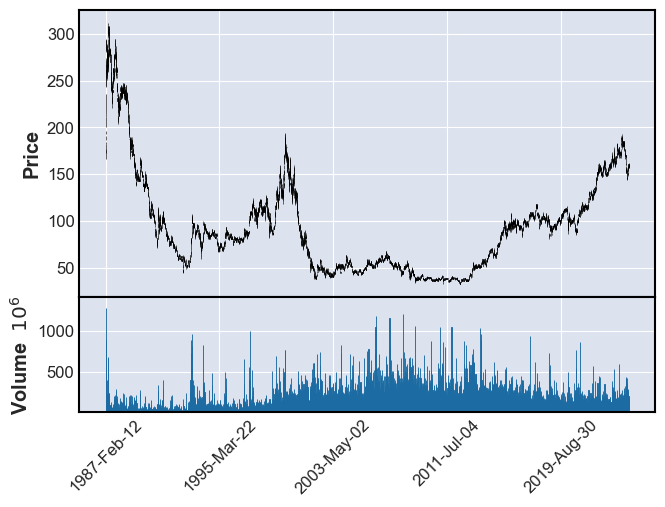

In [5]:
mpf.plot(df, type='candle', volume=True)

In [6]:
df.describe()

,close,open,high,low,volume
count,9202.000000,9202.000000,9202.000000,9202.000000,9.202000e+03
mean,92.180961,92.256183,93.176451,91.330146,1.726677e+08
std,50.452228,50.598215,51.049837,50.087405,1.251280e+08
min,33.000000,33.000000,33.200000,32.200000,9.340000e+06
25%,52.000000,52.100000,52.800000,51.500000,8.073000e+07
50%,85.100000,85.100000,86.050000,84.200000,1.540150e+08
75%,110.800000,110.800000,111.900000,109.275000,2.305225e+08
max,305.900000,309.800000,311.800000,303.900000,1.280000e+09


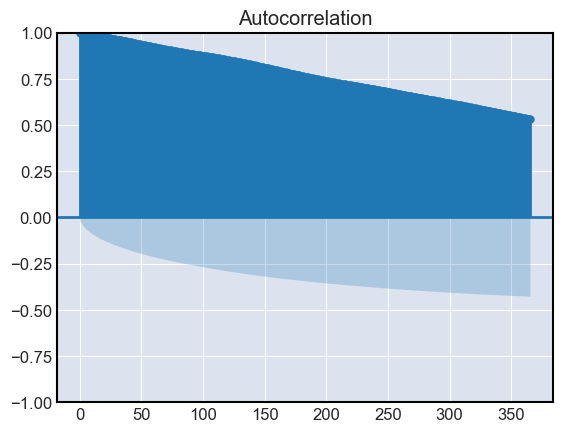

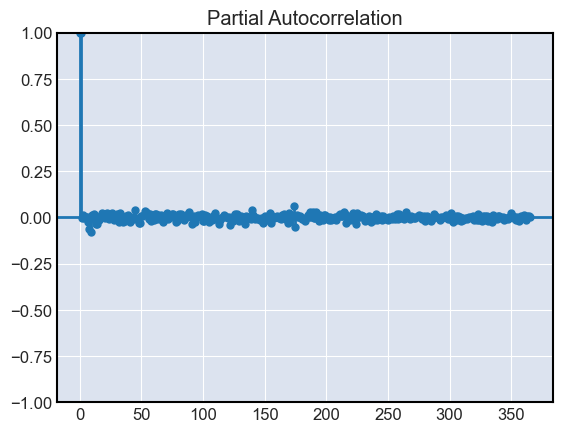

In [7]:
import statsmodels.api as sm

x = sm.graphics.tsa.plot_acf(df['close'], lags=365)
y = sm.graphics.tsa.plot_pacf(df['close'], lags=365)
plt.show()

In [8]:
mean = df['close'].mean()
std = df['close'].std()
df['zscore'] = (df['close'] - mean) / std

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]
outliers

,close,open,high,low,volume,rate,zscore
date,,,,,,,
1987-02-24,270.6,258.8,272.5,257.8,605420000,15.00%,3.536396
1987-02-25,252.9,258.8,262.7,252.0,733930000,-6.54%,3.185569
1987-02-26,247.1,256.9,261.8,243.1,349450000,-2.29%,3.070608
1987-02-27,253.9,250.0,262.7,244.1,347710000,2.75%,3.205389
1987-03-02,263.7,265.7,267.6,259.8,320110000,3.86%,3.399633
...,...,...,...,...,...,...,...
1988-04-28,244.1,240.2,246.1,239.2,238640000,1.62%,3.011146
1988-05-02,246.1,247.1,248.0,246.1,146810000,0.82%,3.050788
1988-06-10,244.1,244.1,246.1,242.2,224550000,1.62%,3.011146


In [10]:
df = df.dropna()
df.count()

close     9202
open      9202
high      9202
low       9202
volume    9202
rate      9202
zscore    9202
dtype: int64